<center>
<img src="images/ods_stickers.jpg" />
    
# Introducción al Machine Learning 2020

Basado en material de  [Yury Kashnitsky](https://yorko.github.io). Traducido y editado al español por [Ana Georgina Flesia](https://www.linkedin.com/in/georginaflesia/). Este material esta sujeto a los términos y condiciones de la licencia  [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso irrestricto para todo propósito no comercial.

# <center>  Visual data analysis
## Ejercicio02 Analizando pasajeros del "Titanic" 

**Complete el código que falta ("# You code here"). No es necesario seleccionar respuestas en un formulario web.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

**Leer datos**

In [2]:
train_df = pd.read_csv("../data/titanic_train.csv", 
                       index_col='PassengerId') 

In [3]:
train_df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
train_df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Vamos a sacar la variable`Cabin`, y todas las filas con NaN's y missing values.**

In [6]:
train_df = train_df.drop('Cabin', axis=1).dropna()

In [7]:
train_df.shape

(712, 10)

**1. Cree una figura para visualizar todos los diagramas de dispersión para cada par de características `Age`, `Fare`, `SibSp`, `Parch` y `Survived`. ( `scatter_matrix ` de Pandas or `pairplot` de Seaborn)**

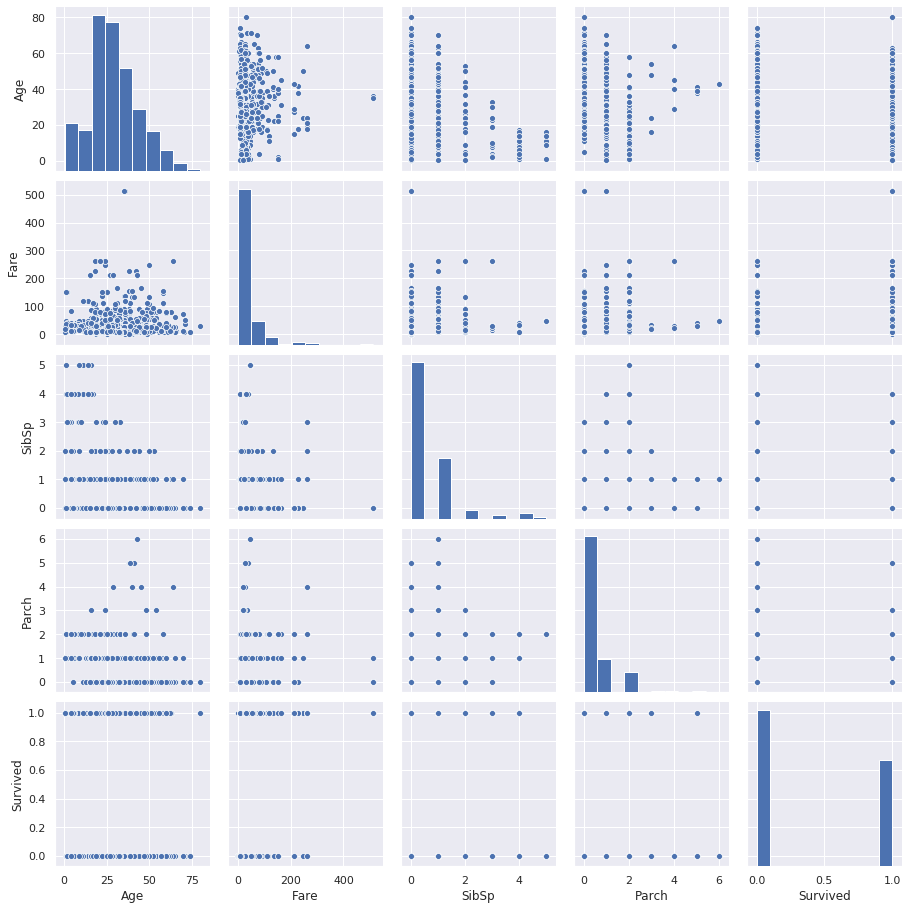

In [8]:
# You code here
sns.pairplot(data = train_df[['Age','Fare','SibSp','Parch','Survived']])

**2. ¿Cómo depende el precio del boleto (`Fare`) de `Pclass`? Construya un diagrama de caja (boxplot).**

Podemos ver que el precio del boleto de primera clase es mas alto que el precio del boleto de segunda y tercera y las cajas casi que no se superponen, lo cual tiene mucho sentido. Estas variables posiblemente esten muy correlacionadas. En este grafico no se aprecia muy bien la diferencia entre boletos de segunda y tercera clase

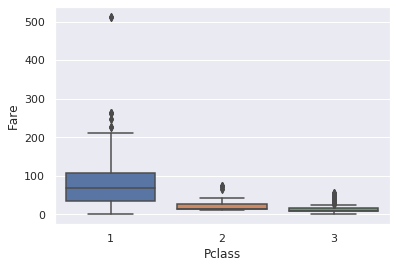

In [9]:
sns.boxplot(x='Pclass',y='Fare',data=train_df)

**3. Construya el mismo gráfico pero restringiendo los valores de `Fare` para que sean menores que el cuantil 95%  del vector inicial (para descartar valores atípicos que hacen que el gráfico sea menos claro).**

Entre boletos de segunda y tercera clase no hay demasiada diferencia, pero sí hay bastante diferencia con los boletos de primera clase. Es raro tambien porque parece haber personas de tercera clase que pagaron lo mismo que las personas de primera (aparecen en el diagrama como outliers).

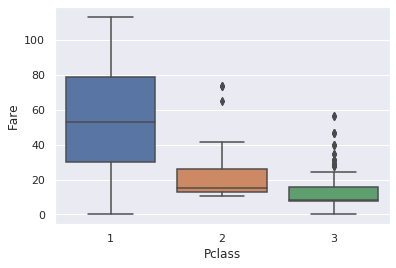

In [10]:
quantile95 = train_df['Fare'].quantile(.95)
quantile95_df = train_df[train_df['Fare'] < quantile95]
sns.boxplot(x='Pclass',y='Fare',data=quantile95_df)

**4. ¿Cómo depende el porcentaje de pasajeros sobrevivientes del género de los pasajeros? Representarlo con `Seaborn.countplot` usando el argumento `hue`.**

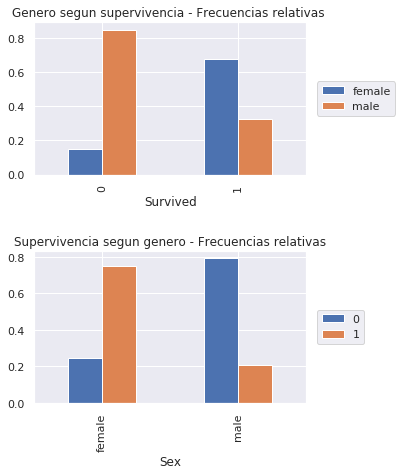

In [22]:
plt.rcParams["figure.figsize"] = 5.6, 7.0
fig, (ax1,ax2) = plt.subplots(nrows= 2)

freq_by_survival = pd.crosstab(train_df["Survived"],train_df["Sex"])
# Vamos a dividir la cantidad de supervivientes por genero por el total de supervivientes, es decir
# Dividimos la fila 0 por la suma de la fila 0 y así obtenemos el valor normalizado de supervivientes por genero
# Dividimos la fila 1 por la suma de la fila 1 y así obtenemos el valor normalizado de no supervivientes por genero
relative_by_survival = freq_by_survival.div(freq_by_survival.sum(axis=1), axis=0)
relative_by_survival.plot(kind="bar", ax=ax1)

freq_by_gender = pd.crosstab(train_df["Sex"],train_df["Survived"])
# De la misma forma, vamos a dividir la cantidad de supervivientes 
# por genero por la cantidad total de cada genero, así obtenemos el valor normalizado
# del porcentaje de supervivencia segun el genero
relative_by_gender = freq_by_gender.div(freq_by_gender.sum(axis=1), axis=0)
relative_by_gender.plot(kind="bar", ax=ax2)

ax1.set_title("Genero segun supervivencia - Frecuencias relativas ")
ax2.set_title("Supervivencia segun genero - Frecuencias relativas")
for a in [ax1, ax2]: a.legend( loc=6, bbox_to_anchor=(1.02,0.5))
plt.subplots_adjust(right=0.8,hspace=0.5)
plt.show()

In [13]:
relative_by_survival

Sex,female,male
Survived,,
0,0.150943,0.849057
1,0.677083,0.322917


En la tabla de arriba podemos ver que de los que sobrevivieron, el 67% son mujeres y el 32% hombres, y de quienes NO sobrevivieron el 15% son mujeres y el 85% hombres

In [14]:
relative_by_gender

Survived,0,1
Sex,,
female,0.247104,0.752896
male,0.794702,0.205298


Segun el genero del pasajero, podemos ver que un 75% de las mujeres sobrevivio y un 25% no; y entre los hombres un 80% no sobrevivio y un 20% sí. 

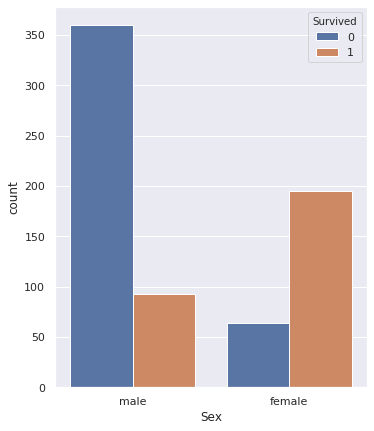

In [15]:
sns.countplot(x="Sex", hue="Survived", data=train_df);

En el grafico de arriba vemos claramente que la cantidad de hombres que sobrevivió es menor a la cantidad de mujeres, y que muchos mas hombres no sobrevivieron

**5. ¿Cómo difiere la distribución de los precios de las entradas para los que sobrevivieron y los que no? Representarlo con `Seaborn.boxplot`**

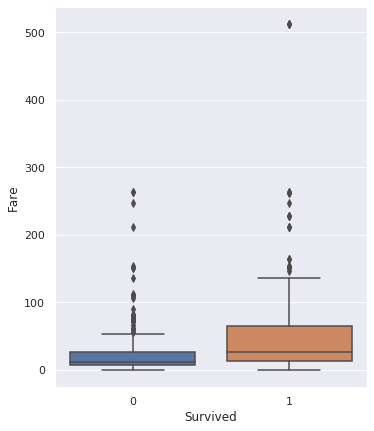

In [16]:
sns.boxplot(x='Survived',y='Fare',data=train_df)

Podemos intentar quitar outliers a ver que sale, pero pareciera que la gente de primera clase que no sobrevivio es un outlier, es decir, en general la gente que no sobrevivio pago mucho menos su pasaje. Se podría decir que en general la gente que sobrevivió pagó más caro el pasaje.

**6. ¿Cómo depende la supervivencia de la edad de los pasajeros? Verifique (gráficamente) una suposición de que los jóvenes (<30 años) sobrevivieron con mayor frecuencia que las personas mayores (> 55 años).**

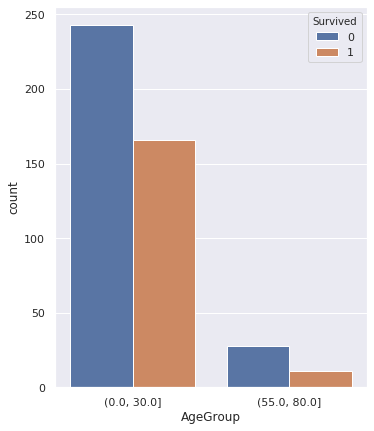

In [17]:
bins = pd.IntervalIndex.from_tuples([(0, 30), (55, train_df.Age.max())])
train_df['AgeGroup'] = pd.cut(train_df.Age, bins= bins)

sns.countplot(x='AgeGroup',hue='Survived',data=train_df)

A priori podriamos pensar que sí, efectivamente los jovenes sobrevivieron más, pero tambien pasa que hay más jovenes entonces deberíamos normalizar esos grupos.   
Haciendo algo similar a lo hecho con el genero, podemos ver que porcentaje de personas mayores sobrevivio y que porcentaje de personas jovenes sobrevivio

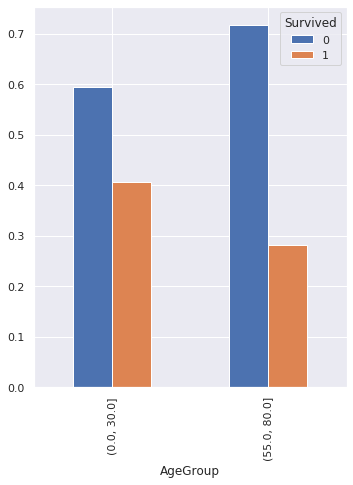

In [18]:
freq_by_ageGroup = pd.crosstab(train_df["AgeGroup"],train_df["Survived"])
relative_by_ageGroup = freq_by_ageGroup.div(freq_by_ageGroup.sum(axis=1), axis=0)
relative_by_ageGroup.plot(kind="bar")

En realidad en este grafico podemos ver que la gente mayor sobrevivio menos que la gente joven, efectivamente, pero no por DEMASIADO. Ahora bien, de los que sobrevivieron posiblemente pocos sean mayores porque hay poca gente mayor en el dataset.

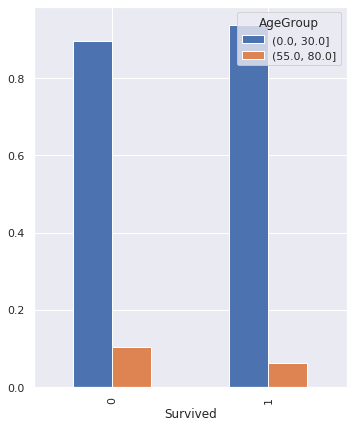

In [19]:
freq_by_survival = pd.crosstab(train_df["Survived"],train_df["AgeGroup"])
relative_by_survival = freq_by_survival.div(freq_by_survival.sum(axis=1), axis=0)
relative_by_survival.plot(kind="bar")

Lo que sí podemos ver en este gráfico, es que ambos grupos etarios estan bastante equilibrados en cuanto a supervivencia/no supervivencia.  
Como vimos antes, podemos notar que en el grupo de los no supervivientes hay un poco mas de gente mayor que en el grupo de los supervivientes.  
Hay proporciones parecidas de gente joven y vieja en ambos grupos de supervivencia